# Bank Marketing


## Introduction :

#### This dataset is based on the bank maketing uci dataset

#### It contains information about the marketing campain impact of a bank specially through telemarketing. It includes 20 independent variables of which 5 are the nationwide socio - economic factors pertaining to the bank's operating country.

#### The classification goal is to predict if the client will subscribe a term deposit variable "y"

## Variables Information :

#### bank client data:

######  1 - age (numeric):
Age of the client
######  2 - job : 
type of job (categorical:"admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
######  3 - marital : 
marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
######  4 - education :
(categorical: "unknown","secondary","primary","tertiary")
######  5 - default: 
has credit in default? (binary: "yes","no")
######  6 - balance: 
average yearly balance, in euros (numeric) 
######  7 - housing: 
has housing loan? (binary: "yes","no")
######  8 - loan: 
has personal loan? (binary: "yes","no")

### related with the last contact of the current campaign:

######  9 - contact: 
contact communication type (categorical: "unknown","telephone","cellular") 
######  10 - day: 
last contact day of the month (numeric)
######  11 - month: 
last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
######  12 - duration: 
last contact duration, in seconds (numeric)

### other attributes:

######  13 - campaign: 
number of contacts performed during this campaign and for this client (numeric, includes last contact)
######  14 - pdays: 
number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
######  15 - previous: 
number of contacts performed before this campaign and for this client (numeric)
######  16 - poutcome: 
outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

### Output variable (desired target):

######  17 - y :
has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
## IMPORTING REQUIRED LIBRARIES 
import pandas as pd
import numpy as np
## LIBRARIES FOR DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
## ALLOWS TO HANDLE THE WARNINGS
import warnings 
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import boxcox
import missingno as msno

In [2]:
## READING THE DATA SET BY USING PANDAS 
## IMPORTING TEST & TRAIN DATAS

bankloan1 = pd.read_csv("train.csv", sep = ";")
bankloan2 = pd.read_csv("test.csv", sep = ";")

pd.pandas.set_option('display.max_columns',None)

In [3]:
##  READING THE FILE
bankloan1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [800]:
## READING THE FILE
bankloan2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [801]:
## COMBINING 2 DATASETS IN ONE BY USING CONCAT FUNCTION
## GETTING 1ST 5 OBSERVATIONS FROM DATA SET 

bank_loan = pd.concat([bankloan1,bankloan2], ignore_index = True)
bank_loan.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [802]:
## GETTING LAST 5 OBSERVATIONS FROM DATA SET 

bank_loan.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
49731,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [803]:
## LOOKING AT THE SHAPE OF THE DATA WHICH WILL HELP 
## TO GET NUMBER OF ROWS AND COLUMNS PRESENT IN THE DATA

bank_loan.shape

(49732, 17)

In [804]:
## CHECKING THE TOTAL SIZE OF THE DATA

bank_loan.size

845444

In [805]:
## GETTING THE TOTAL INFORMATION ABOUT THE DATA INCLUDING DATATYPE, COUNT OF ROWS PRESENT AND NULL VALUES COUNT 

bank_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


In [806]:
## CONVERTING OBJECT TYPE DATA INTO CATEGORICAL DATA

cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
bank_loan[cat_cols] = bank_loan[cat_cols].astype('category')
bank_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        49732 non-null  int64   
 1   job        49732 non-null  category
 2   marital    49732 non-null  category
 3   education  49732 non-null  category
 4   default    49732 non-null  category
 5   balance    49732 non-null  int64   
 6   housing    49732 non-null  category
 7   loan       49732 non-null  category
 8   contact    49732 non-null  category
 9   day        49732 non-null  int64   
 10  month      49732 non-null  category
 11  duration   49732 non-null  int64   
 12  campaign   49732 non-null  int64   
 13  pdays      49732 non-null  int64   
 14  previous   49732 non-null  int64   
 15  poutcome   49732 non-null  category
 16  y          49732 non-null  category
dtypes: category(10), int64(7)
memory usage: 3.1 MB


In [807]:
## TAKING THE NUMERICAL VARIABLES
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [808]:
## STATICALSUMMERY OF DATASET

bank_loan.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,49732.0,NaN,NaN,NaN,40.957472,10.615008,18.0,33.0,39.0,48.0,95.0
job,49732,12,blue-collar,10678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,49732,3,married,30011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,49732,4,secondary,25508,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,49732,2,no,48841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,49732.0,NaN,NaN,NaN,1367.761562,3041.608766,-8019.0,72.0,448.0,1431.0,102127.0
housing,49732,2,yes,27689,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,49732,2,no,41797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,49732,3,cellular,32181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,49732.0,NaN,NaN,NaN,15.816315,8.31568,1.0,8.0,16.0,21.0,31.0


In [809]:
##  CHECKING FOR NULL VALUES

bank_loan.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [810]:
## CHECKING FOR UNIQUE VALUES

bank_loan.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

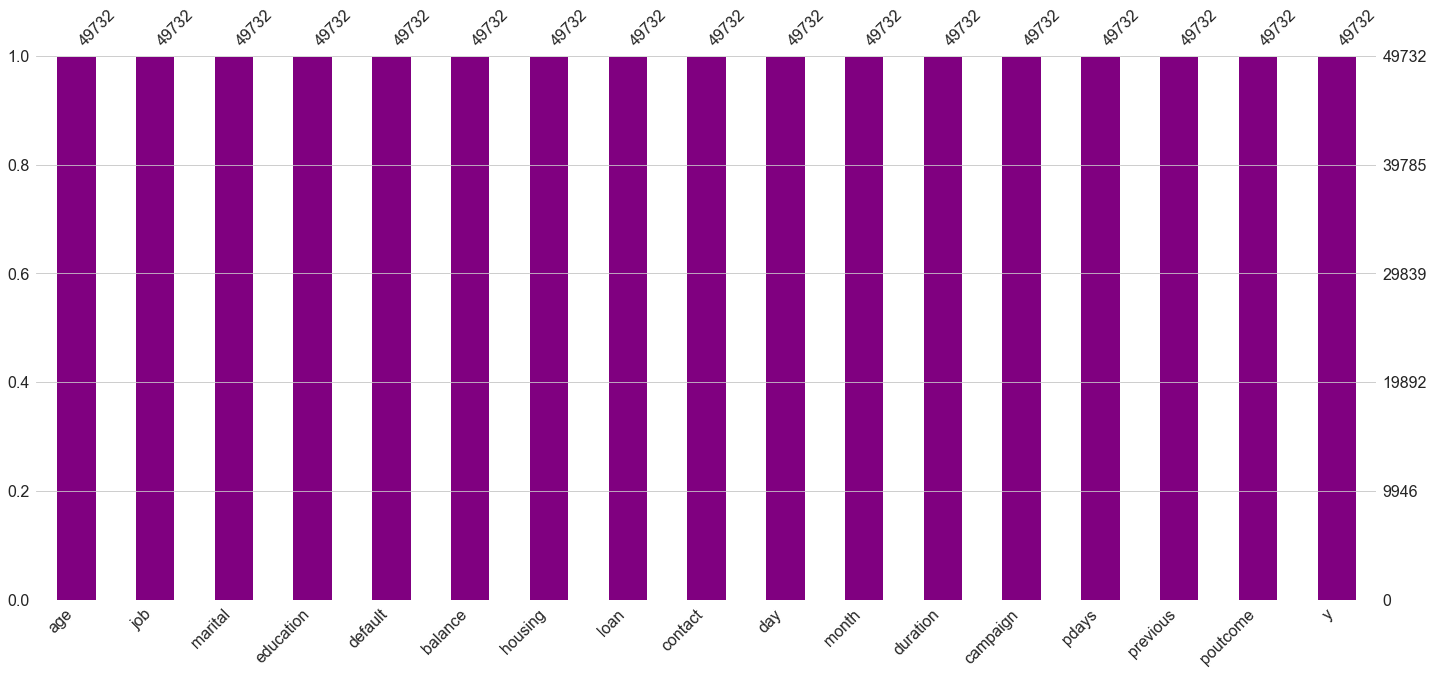

In [811]:
## BY USING MISSINGNO BAR PLOT CHECKING NULL VALUES COUNT

msno.bar(bank_loan, color = 'purple')
plt.show()

###### There are no null values or missing values in the given data

In [812]:
## CHECKING CATEGORICAL VARIABLES UNIQUE VALUES 

bank_loan[cat_cols].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64

In [813]:
## CHECKING NUMERICAL VARIABLES UNIQUE VALUES 

bank_loan[num_cols].nunique()

age           77
balance     7168
day           31
duration    1573
campaign      48
pdays        559
previous      41
dtype: int64

In [814]:
## CHANGING DATA SET NAME

bankloan = bank_loan

### Now lets look at some distribution of categorical variables.

#### Job : From the visual below, we can conclude that people with blue-collar and management jobs took part the most in the campaign.

blue-collar      10678
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: job, dtype: int64


<AxesSubplot:xlabel='job', ylabel='count'>

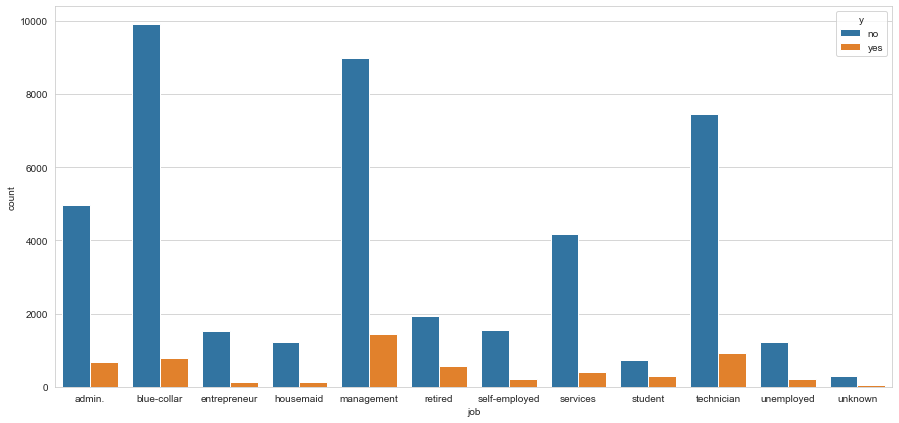

In [815]:
## BY USING COUNTPLOT CHECKING THE COUNT AND DISTRIBUTION OF SOME CATEGORICAL VARIABLES
## BY USING VALUECOUNTS FUNCTION GETTING THE COUNT OF THE VARIABLE
print(bankloan['job'].value_counts())
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.countplot(x = 'job', data = bankloan, hue = 'y')

#### marital : there are more married people who took part in the campaign than single people and divorced people.

married     30011
single      13986
divorced     5735
Name: marital, dtype: int64


<AxesSubplot:xlabel='marital', ylabel='count'>

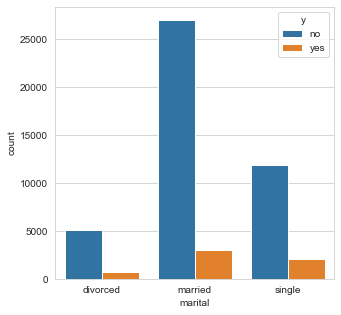

In [816]:
## BY USING COUNTPLOT CHECKING THE COUNT AND DISTRIBUTION OF SOME CATEGORICAL VARIABLES
## BY USING VALUECOUNTS FUNCTION GETTING THE COUNT OF THE VARIABLE
print(bankloan['marital'].value_counts())
sns.set_style('whitegrid')
plt.figure(figsize = (5,5))
sns.countplot(x ='marital', data = bankloan, hue = 'y')

#### Education : there are more clients who had a secondary education who had taken part in the campaign.

secondary    25508
tertiary     14651
primary       7529
unknown       2044
Name: education, dtype: int64


<AxesSubplot:xlabel='education', ylabel='count'>

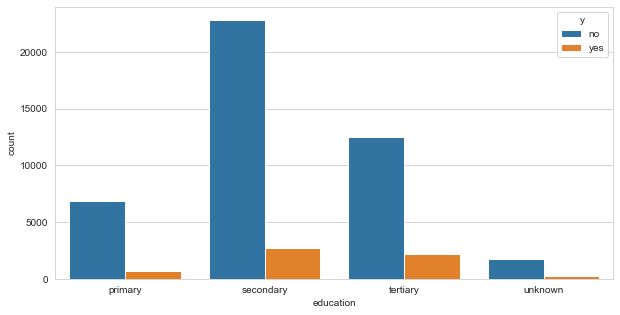

In [817]:
## BY USING COUNTPLOT CHECKING THE COUNT AND DISTRIBUTION OF SOME CATEGORICAL VARIABLES
## BY USING VALUECOUNTS FUNCTION GETTING THE COUNT OF THreE VARIABLE
print(bankloan['education'].value_counts())
sns.set_style('whitegrid')
plt.figure(figsize = (10,5))
sns.countplot(x ='education', data = bankloan, hue = 'y')

#### Housing : most of the clients having house loan.

yes    27689
no     22043
Name: housing, dtype: int64


<AxesSubplot:xlabel='housing', ylabel='count'>

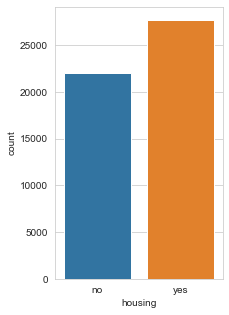

In [818]:
## BY USING COUNTPLOT CHECKING THE COUNT AND DISTRIBUTION OF SOME CATEGORICAL VARIABLES
## BY USING VALUECOUNTS FUNCTION GETTING THE COUNT OF THE VARIABLE
print(bankloan['housing'].value_counts())
sns.set_style('whitegrid')
plt.figure(figsize = (3,5))
sns.countplot(bankloan['housing'])

### Loan : most clients had not taken a personal loan. 

no     41797
yes     7935
Name: loan, dtype: int64


<AxesSubplot:xlabel='loan', ylabel='count'>

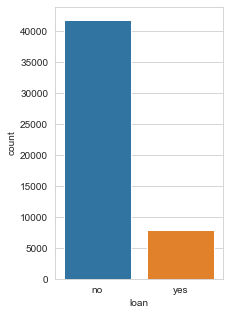

In [819]:
## BY USING COUNTPLOT CHECKING THE COUNT AND DISTRIBUTION OF SOME CATEGORICAL VARIABLES
## BY USING VALUECOUNTS FUNCTION GETTING THE COUNT OF THE VARIABLE
print(bankloan['loan'].value_counts())
sns.set_style('whitegrid')
plt.figure(figsize = (3,5))
sns.countplot(bankloan['loan'])

#### Target variable "y" : Out of 49732 records, there were 5810 subscrtions to term depsoit. And 43922 clients did not subscribed.

no     43922
yes     5810
Name: y, dtype: int64


<AxesSubplot:xlabel='y', ylabel='count'>

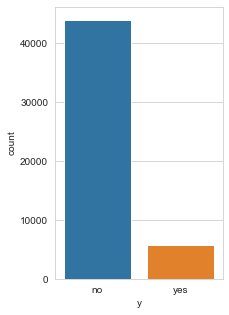

In [820]:
## BY USING COUNTPLOT CHECKING THE COUNT AND DISTRIBUTION OF SOME CATEGORICAL VARIABLES
## BY USING VALUECOUNTS FUNCTION GETTING THE COUNT OF THE VARIABLE
print(bankloan['y'].value_counts())
sns.set_style('whitegrid')
plt.figure(figsize = (3,5))
sns.countplot(bankloan['y'])

### Distribution of numerical variable :

<function matplotlib.pyplot.show(close=None, block=None)>

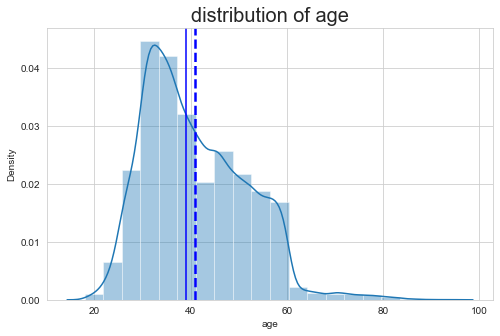

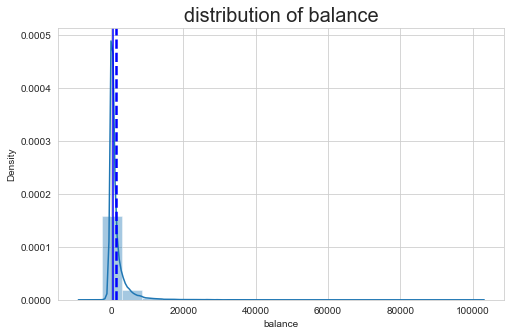

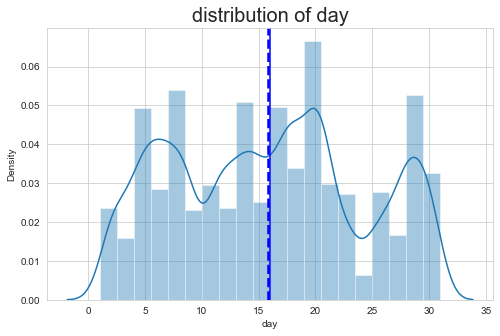

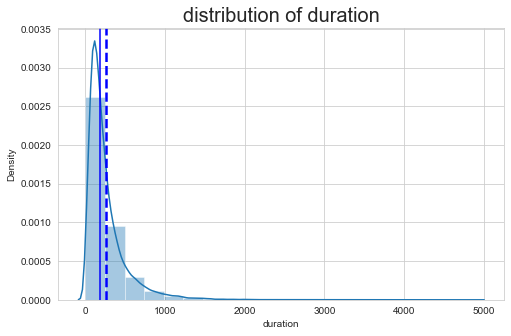

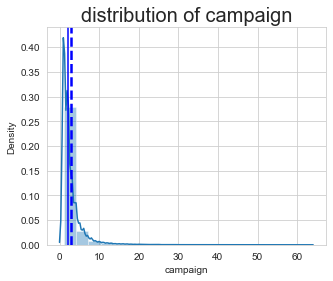

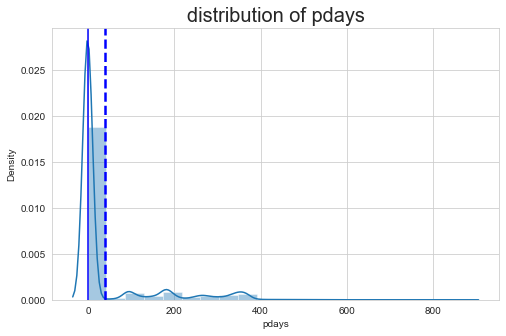

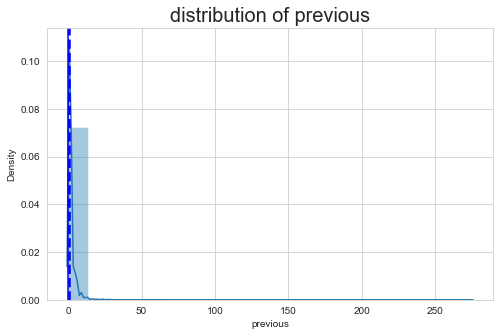

In [827]:
## CHECKING THE DISTRIBUTION OF ALL NUMERICAL DATA BY USING 'DISTPLOT'

## GIVING FIGURE SIZE
plt.figure(figsize = (8,5))   

## CHECKING NUMERICAL DATA DISTRIBUTION BY USING DISTRIBUTION PLOT 
sns.distplot(bankloan['age'],bins = 20, kde = True)

## GIVING TITLE TO PLOT 
plt.title('distribution of age',fontsize=20)   

## GIVING MEAN AND MEDIAN LINES ALONG WITH DISTRIBUTION
plt.axvline(x=bankloan['age'].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=bankloan['age'].median(),color='blue',label="median") # fixing 'median' line and its characteristics.
plt.show

## GIVING FIGURE SIZE
plt.figure(figsize = (8,5))

## CHECKING NUMERICAL DATA DISTRIBUTION BY USING DISTRIBUTION PLOT 
sns.distplot(bankloan['balance'],bins = 20, kde = True)

## GIVING TITLE TO PLOT 
plt.title('distribution of balance',fontsize=20)

## GIVING MEAN AND MEDIAN LINES ALONG WITH DISTRIBUTION
plt.axvline(x=bankloan['balance'].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=bankloan['balance'].median(),color='blue',label="median") # fixing 'median' line and its characteristics.
plt.show

## GIVING FIGURE SIZE
plt.figure(figsize = (8,5))

## CHECKING NUMERICAL DATA DISTRIBUTION BY USING DISTRIBUTION PLOT 
sns.distplot(bankloan['day'],bins = 20, kde = True)

## GIVING TITLE TO PLOT 
plt.title('distribution of day',fontsize=20)

## GIVING MEAN AND MEDIAN LINES ALONG WITH DISTRIBUTION
plt.axvline(x=bankloan['day'].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=bankloan['day'].median(),color='blue',label="median") # fixing 'median' line and its characteristics.
plt.show

## GIVING FIGURE SIZE
plt.figure(figsize = (8,5))

## CHECKING NUMERICAL DATA DISTRIBUTION BY USING DISTRIBUTION PLOT 
sns.distplot(bankloan['duration'],bins = 20, kde = True)

## GIVING TITLE TO PLOT 
plt.title('distribution of duration',fontsize=20)

## GIVING MEAN AND MEDIAN LINES ALONG WITH DISTRIBUTION
plt.axvline(x=bankloan['duration'].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=bankloan['duration'].median(),color='blue',label="median") # fixing 'median' line and its characteristics.
plt.show

## GIVING FIGURE SIZE
plt.figure(figsize = (5,4))

## CHECKING NUMERICAL DATA DISTRIBUTION BY USING DISTRIBUTION PLOT 
sns.distplot(bankloan['campaign'],bins = 20, kde = True)

## GIVING TITLE TO PLOT 
plt.title('distribution of campaign',fontsize=20)

## GIVING MEAN AND MEDIAN LINES ALONG WITH DISTRIBUTION
plt.axvline(x=bankloan['campaign'].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=bankloan['campaign'].median(),color='blue',label="median") # fixing 'median' line and its characteristics.
plt.show

## GIVING FIGURE SIZE
plt.figure(figsize = (8,5))

## CHECKING NUMERICAL DATA DISTRIBUTION BY USING DISTRIBUTION PLOT 
sns.distplot(bankloan['pdays'],bins = 20, kde = True)

## GIVING TITLE TO PLOT 
plt.title('distribution of pdays',fontsize=20)

## GIVING MEAN AND MEDIAN LINES ALONG WITH DISTRIBUTION
plt.axvline(x=bankloan['pdays'].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=bankloan['pdays'].median(),color='blue',label="median") # fixing 'median' line and its characteristics.
plt.show

## GIVING FIGURE SIZE
plt.figure(figsize = (8,5))

## CHECKING NUMERICAL DATA DISTRIBUTION BY USING DISTRIBUTION PLOT 
sns.distplot(bankloan['previous'],bins = 20, kde = True)

## GIVING TITLE TO PLOT 
plt.title('distribution of previous',fontsize=20)

## GIVING MEAN AND MEDIAN LINES ALONG WITH DISTRIBUTION
plt.axvline(x=bankloan['previous'].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=bankloan['previous'].median(),color='blue',label="median") # fixing 'median' line and its characteristics.
plt.show

###### Distribution of ‘Age’ variable seems normal distributed but sightly towards right side.
###### Distribution of ‘balance’ variable is completely right skewed.Variable ‘day’ is normally distributed.
###### Distribution of ‘duration’ variable is completely right skewed.
###### Distribution of ‘campaign’ variable is completely right skewed.
###### Distribution of ‘pdays’ and ‘previous’ variables are also completely right skewed.

### Checking for outliers :

Text(0.5, 1.0, 'outliers in age')

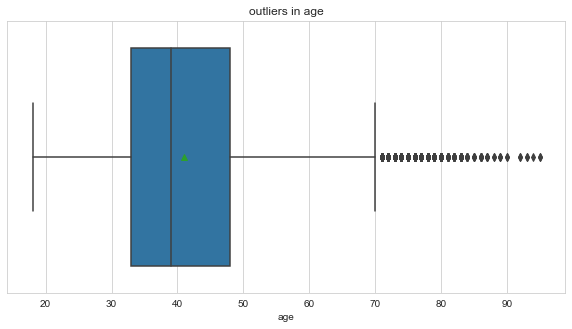

In [829]:
plt.figure(figsize=(10,5))                         # fixing graph size.
sns.set_style("whitegrid")                         # fixing graph background.
sns.boxplot(x='age',data=bankloan,showmeans=True)    # plotting boxplot,using both mean and median.
plt.title('outliers in age')                      # giving title to the graph.

######  'age' variable has outliers and is also right skewed

Text(0.5, 1.0, 'outliers in balance')

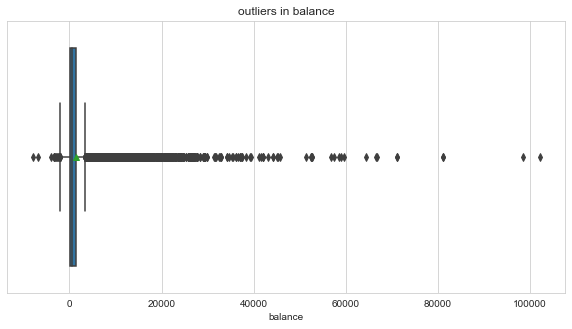

In [830]:
plt.figure(figsize=(10,5))                         # fixing graph size.
sns.set_style("whitegrid")                         # fixing graph background.
sns.boxplot(x='balance',data=bankloan,showmeans=True)    # plotting boxplot,using both mean and median.
plt.title('outliers in balance')                      # giving title to the graph.

######  'balance' variable has many outliers and highly right skewed

Text(0.5, 1.0, 'outliers in day')

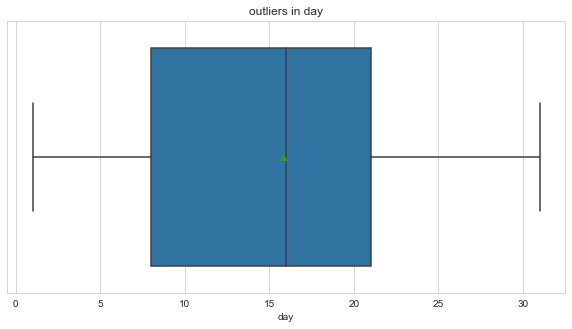

In [831]:
plt.figure(figsize=(10,5))                         # fixing graph size.
sns.set_style("whitegrid")                         # fixing graph background.
sns.boxplot(x='day',data=bankloan,showmeans=True)    # plotting boxplot,using both mean and median.
plt.title('outliers in day')                      # giving title to the graph.

######  'day' variable has no outliers

Text(0.5, 1.0, 'outliers in duration')

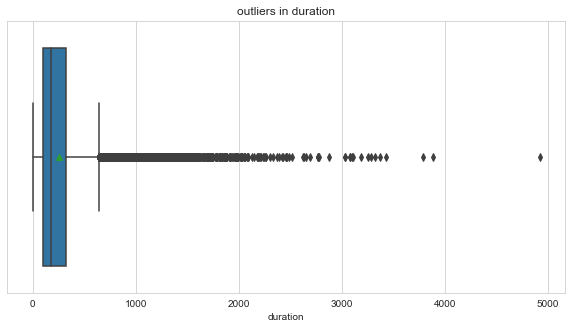

In [832]:
plt.figure(figsize=(10,5))                         # fixing graph size.
sns.set_style("whitegrid")                         # fixing graph background.
sns.boxplot(x='duration',data=bankloan,showmeans=True)    # plotting boxplot,using both mean and median.
plt.title('outliers in duration')                      # giving title to the graph.

######  'duration' varible has many outliers and highly right skewed 

Text(0.5, 1.0, 'outliers in campaign')

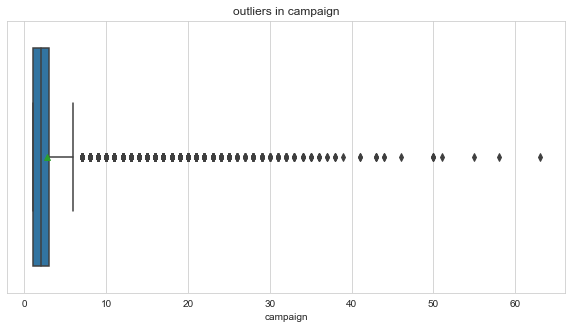

In [833]:
plt.figure(figsize=(10,5))                         # fixing graph size.
sns.set_style("whitegrid")                         # fixing graph background.
sns.boxplot(x='campaign',data=bankloan,showmeans=True)    # plotting boxplot,using both mean and median.
plt.title('outliers in campaign')                      # giving title to the graph.

######  'campaign' variable has outliers and is highly right skewed.

Text(0.5, 1.0, 'outliers in pdays')

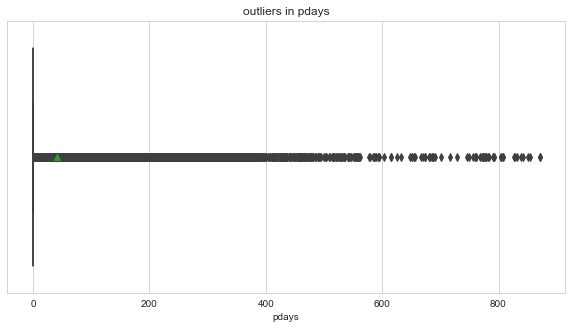

In [834]:
plt.figure(figsize=(10,5))                         # fixing graph size.
sns.set_style("whitegrid")                         # fixing graph background.
sns.boxplot(x='pdays',data=bankloan,showmeans=True)    # plotting boxplot,using both mean and median.
plt.title('outliers in pdays')                      # giving title to the graph.

######  'pdays' variable has so many outliers and is highly right skewed.

Text(0.5, 1.0, 'outliers in previous')

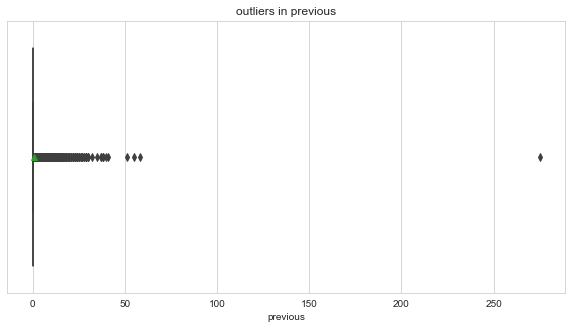

In [835]:
plt.figure(figsize=(10,5))                         # fixing graph size.
sns.set_style("whitegrid")                         # fixing graph background.
sns.boxplot(x='previous',data=bankloan,showmeans=True)    # plotting boxplot,using both mean and median.
plt.title('outliers in previous')                      # giving title to the graph.

* 'previous' variable has outliers and is highly right skewed. 

### Squareroot transformation for skewed numerical variables :-

In [836]:
bankloan['age'] = np.sqrt(bankloan.age)       # using log transformation
bankloan['balance'] = np.sqrt(bankloan.balance)   # using log transformation
bankloan['duration'] = np.sqrt(bankloan.duration)  # using log transformation
bankloan['campaign'] = np.sqrt(bankloan.campaign)  # using log transformation
bankloan['pdays'] = np.sqrt(bankloan.pdays)     # using log transformation
bankloan['previous'] = np.sqrt(bankloan.previous)  # using log transformation

### Checking for Outliers After Square root transformation :- 

* Remove outliers cause loss of data. 
* So, transformation is preferred.
* Here I choosed squareroot transformation, because log transformation not working properly, and box-cox can't be used on zero/negative values.
* After squareroot transforming the skewed variables, still there are some outliers, but there skeweness is treated.

Text(0.5, 1.0, 'age after log transformation')

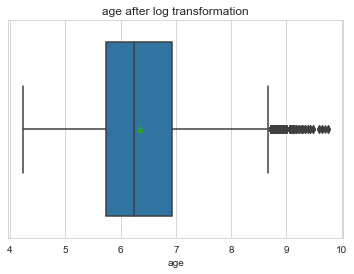

In [838]:
# checking for outliers after transformation using boxplot 
# using box plot to check the outliers 
sns.boxplot(x = 'age', data = bankloan, showmeans = True)
# giving title to plot
plt.title('age after log transformation') 


* Still having some outliers in variable 'age', but it seems better.

Text(0.5, 1.0, 'balance after log transformation')

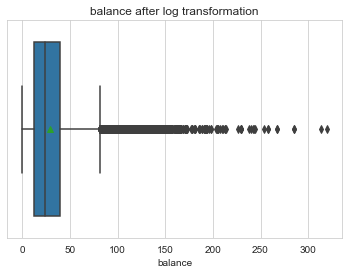

In [839]:
# checking for outliers after transformation using boxplot 
# using box plot to check the outliers 
sns.boxplot(x = 'balance', data = bankloan, showmeans = True)
## GIVING TITLE TO PLOT
plt.title('balance after log transformation')

* 'balance' variable having some outliers.

Text(0.5, 1.0, 'duration after log transformation')

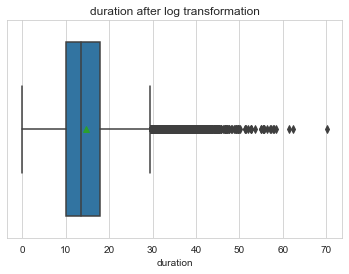

In [840]:
# checking for outliers after transformation using boxplot 
# using box plot to check the outliers 
sns.boxplot(x = 'duration', data = bankloan, showmeans = True)
## GIVING TITLE TO PLOT
plt.title('duration after log transformation')

* 'Duration' variable having outliers

Text(0.5, 1.0, 'campaign after log transformation')

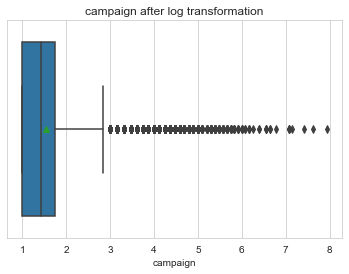

In [841]:
# checking for outliers after transformation using boxplot 
# using box plot to check the outliers 
sns.boxplot(x = 'campaign', data = bankloan, showmeans = True)
## giving title to plot
plt.title('campaign after log transformation')

* 'campaign' variable having outliers.

Text(0.5, 1.0, 'pdays after log transformation')

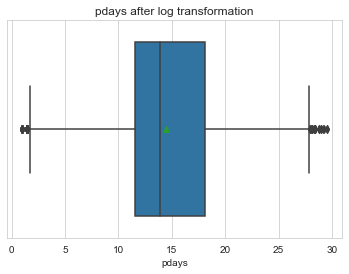

In [842]:
# checking for outliers after transformation using boxplot 
# using box plot to check the outliers 
sns.boxplot(x = 'pdays', data = bankloan, showmeans = True)
## giving title to plot 
plt.title('pdays after log transformation')

* 'pdays' variable having few outliers. 

Text(0.5, 1.0, 'previous after log transformation')

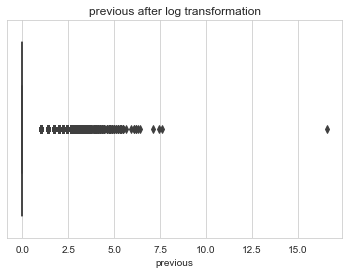

In [843]:
# checking for outliers after transformation using boxplot 
# using box plot to check the outliers 
sns.boxplot(x = 'previous', data = bankloan)
## giving title to plot
plt.title('previous after log transformation')

* 'previous' has still more outliers. 

#### After Squareroot transformation also there are outliers. So we can treat them by using IQR method.

### IQR method for which variable is having still outliers :

<AxesSubplot:xlabel='age'>

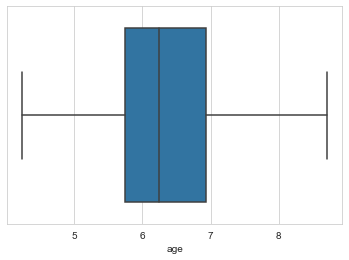

In [844]:
# first finding IQR value
# after that getting lower_whisker and Upper_whisker values
# by using these treating the outliers
# and againg using boxplot checking for outliers

Q1 = np.percentile(bankloan['age'], 25, interpolation = "midpoint")
Q2 = np.percentile(bankloan['age'], 50, interpolation = "midpoint")
Q3 = np.percentile(bankloan['age'], 75, interpolation = "midpoint")
IQR = Q3-Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
bankloan['age'] = np.where(bankloan['age']>upper_whisker, upper_whisker, bankloan['age'])
sns.boxplot(bankloan['age'])

* Now, there are no outliers in "age" variable.

<AxesSubplot:xlabel='balance'>

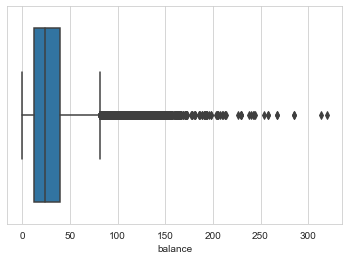

In [845]:
# first finding IQR value
# after that getting lower_whisker and Upper_whisker values
# by using these treating the outliers
# and againg using boxplot checking for outliers

Q1 = np.percentile(bankloan['balance'], 25, interpolation = "midpoint")
Q2 = np.percentile(bankloan['balance'], 50, interpolation = "midpoint")
Q3 = np.percentile(bankloan['balance'], 75, interpolation = "midpoint")
IQR = Q3-Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
bankloan['balance'] = np.where(bankloan['balance']>upper_whisker, upper_whisker, bankloan['balance'])
sns.boxplot(bankloan['balance'])

* "balance" variable has outliers.

<AxesSubplot:xlabel='duration'>

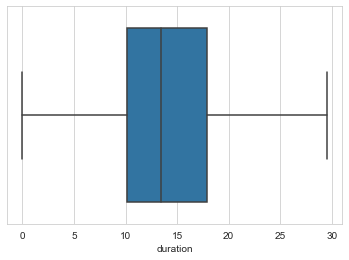

In [846]:
# first finding IQR value
# after that getting lower_whisker and Upper_whisker values
# by using these treating the outliers
# and againg using boxplot checking for outliers

Q1 = np.percentile(bankloan['duration'], 25, interpolation = "midpoint")
Q2 = np.percentile(bankloan['duration'], 50, interpolation = "midpoint")
Q3 = np.percentile(bankloan['duration'], 75, interpolation = "midpoint")
IQR = Q3-Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
bankloan['duration'] = np.where(bankloan['duration']>upper_whisker, upper_whisker, bankloan['duration'])
sns.boxplot(bankloan['duration'])

* 'Duration' variable has no outliers.

<AxesSubplot:xlabel='campaign'>

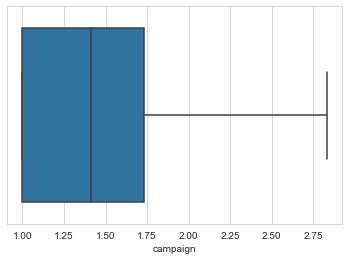

In [847]:
# first finding IQR value
# after that getting lower_whisker and Upper_whisker values
# by using these treating the outliers
# and againg using boxplot checking for outliers

Q1 = np.percentile(bankloan['campaign'], 25, interpolation = "midpoint")
Q2 = np.percentile(bankloan['campaign'], 50, interpolation = "midpoint")
Q3 = np.percentile(bankloan['campaign'], 75, interpolation = "midpoint")
IQR = Q3-Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
bankloan['campaign'] = np.where(bankloan['campaign']>upper_whisker, upper_whisker, bankloan['campaign'])
sns.boxplot(bankloan['campaign'])

* 'campaign' variable has no outliers.

* we still have some outliers in 'pdays' and 'previous' variables.

### Bivariate analysis :

<AxesSubplot:xlabel='y', ylabel='age'>

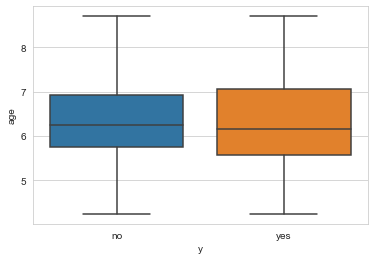

In [849]:
## bivariate analysis with categorical and numerical variable
## by using box plot checking retion to categorical and numerical variable
sns.boxplot(x = 'y', y = 'age', data = bankloan) # plotting box between two variables

<AxesSubplot:xlabel='y', ylabel='balance'>

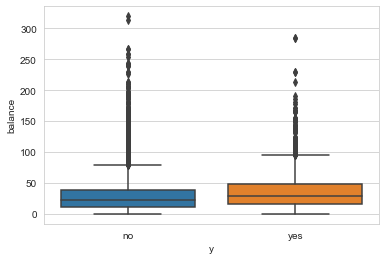

In [850]:
## bivariate analysis with categorical and numerical variable
## by using box plot checking relation to categorical and numerical variable
sns.boxplot(x = 'y', y = 'balance', data = bankloan) # plotting box between two variables

<AxesSubplot:xlabel='y', ylabel='campaign'>

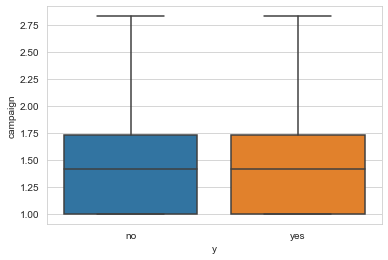

In [851]:
## bivariate analysis with categorical and numerical variable
## by using box plot checking retion to categorical and numerical variable
sns.boxplot(x = 'y', y = 'campaign', data = bankloan) # plotting box between two variables

<AxesSubplot:xlabel='loan', ylabel='age'>

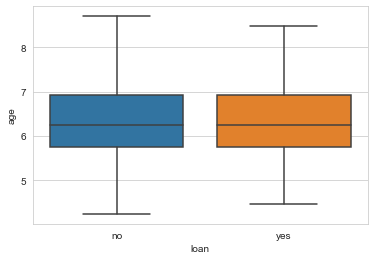

In [852]:
## bivariate analysis with categorical and numerical variable
## by using box plot checking retion to categorical and numerical variable
sns.boxplot(x = 'loan', y = 'age', data = bankloan)

<AxesSubplot:xlabel='loan', ylabel='campaign'>

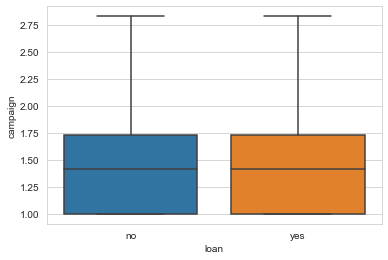

In [853]:
## bivariate analysis with categorical and numerical variable
## by using box plot checking retion to categorical and numerical variable
sns.boxplot(x = 'loan', y = 'campaign', data = bankloan)

#### Multivariate analysis :

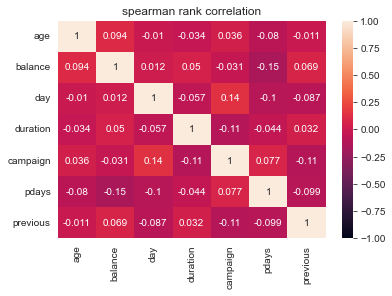

In [854]:
# spearman-rank correlation heatmap 
bankloan.corr(method = 'spearman')
heatmap = sns.heatmap(bankloan.corr (method = 'spearman'). round(3), vmin = -1, vmax = 1, annot=True)
## giving title to plot
plt.title('spearman rank correlation')
plt.show()

In [855]:
bankloan.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.107986,-0.009076,-0.014352,0.027013,-0.095399,-0.000063
balance,0.107986,1.000000,0.011478,0.039312,-0.026666,-0.114346,0.048509
day,-0.009076,0.011478,1.000000,-0.046895,0.157668,-0.089008,-0.079157
duration,-0.014352,0.039312,-0.046895,1.000000,-0.123555,-0.041321,0.015957
campaign,0.027013,-0.026666,0.157668,-0.123555,1.000000,0.060956,-0.080778
pdays,-0.095399,-0.114346,-0.089008,-0.041321,0.060956,1.000000,-0.059253
previous,-0.000063,0.048509,-0.079157,0.015957,-0.080778,-0.059253,1.000000


blue-collar      10678
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: job, dtype: int64
married     30011
single      13986
divorced     5735
Name: marital, dtype: int64
secondary    25508
tertiary     14651
primary       7529
unknown       2044
Name: education, dtype: int64


<AxesSubplot:xlabel='education', ylabel='count'>

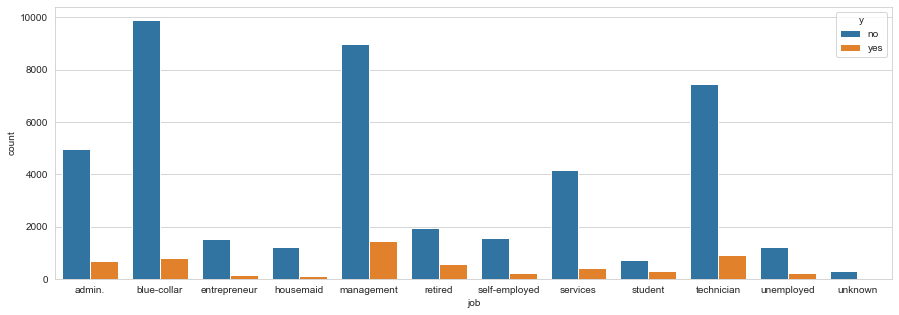

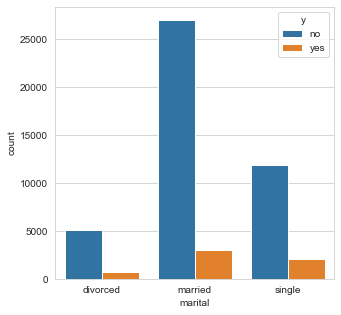

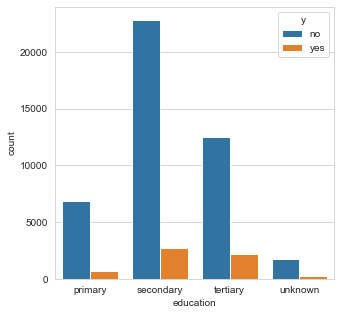

In [856]:
## BY USING COUNTPLOT CHECKING THE COUNT AND DISTRIBUTION OF SOME CATEGORICAL VARIABLES
## BY USING VALUECOUNTS FUNCTION GETTING THE COUNT OF THE VARIABLE
print(bankloan['job'].value_counts())
sns.set_style('whitegrid')
plt.figure(figsize = (15,5))
sns.countplot(x = 'job', data = bankloan, hue = 'y')

## BY USING COUNTPLOT CHECKING THE COUNT AND DISTRIBUTION OF SOME CATEGORICAL VARIABLES
## BY USING VALUECOUNTS FUNCTION GETTING THE COUNT OF THE VARIABLE
print(bankloan['marital'].value_counts())
sns.set_style('whitegrid')
plt.figure(figsize = (5,5))
sns.countplot(x ='marital', data = bankloan, hue = 'y')

## BY USING COUNTPLOT CHECKING THE COUNT AND DISTRIBUTION OF SOME CATEGORICAL VARIABLES
## BY USING VALUECOUNTS FUNCTION GETTING THE COUNT OF THE VARIABLE
print(bankloan['education'].value_counts())
sns.set_style('whitegrid')
plt.figure(figsize = (5,5))
sns.countplot(x ='education', data = bankloan, hue = 'y')

#### Final conlusion :

* The people who are working at blue-collar, management and technicians are less intrested to subscribe for term deposit.

* Married clients are not most subscribed to term diposit. 
* We have high count on married clients. So we can conclude that campaign should target the married people.

* Secondary educated clients are not subscribed most to term deposit. 
* We have high count on secondary educated and tertiary clients than other. 
* So we can conclude that campaign should target the secodary and tertiary clients.